# Task 1: Big Data Analysis using Online Retail II Dataset

In this task, I analyzed the Online Retail II dataset, which contains transaction-level data from an e-commerce business.
The dataset is relatively large and closely represents real-world business data.

The main objective of this analysis was to clean the data, explore sales patterns,
and extract insights that can support business decision-making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/online_retail_ii.csv", encoding="latin1")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


The dataset includes invoice details, product information, quantities, prices,
customer data, invoice dates, and country information.

An initial inspection was performed to understand the size, structure,
and data types present in the dataset.

In [3]:
df.shape

(541910, 8)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  str    
 1   StockCode    541910 non-null  str    
 2   Description  540456 non-null  str    
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  str    
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


The dataset contains several hundred thousand records, making it closer to real-world
business data rather than a small sample dataset.

Handling such datasets requires careful cleaning and efficient processing.

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [6]:
df.columns = df.columns.str.strip().str.replace(" ", "")
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='str')

In [7]:
df = df.dropna(subset=["CustomerID"])
df.shape

(406830, 8)

In [8]:
df = df[~df["Invoice"].astype(str).str.startswith("C")]
df.shape

(397925, 8)

In [9]:
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]
df.shape

(397885, 8)

In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

In [11]:
df = df.dropna(subset=["InvoiceDate"])

In [12]:
df["InvoiceDate"].head()
df.info()

<class 'pandas.DataFrame'>
Index: 168632 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      168632 non-null  str           
 1   StockCode    168632 non-null  str           
 2   Description  168632 non-null  str           
 3   Quantity     168632 non-null  int64         
 4   InvoiceDate  168632 non-null  datetime64[us]
 5   Price        168632 non-null  float64       
 6   CustomerID   168632 non-null  float64       
 7   Country      168632 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), str(4)
memory usage: 11.6 MB


Before analysis, several data cleaning steps were performed.
Missing customer records were removed, cancelled invoices were excluded,
and invalid quantities and prices were filtered out to ensure accurate analysis.

In [13]:
df["TotalSales"] = df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["MonthName"] = df["InvoiceDate"].dt.month_name()

New features were created to calculate total sales per transaction
and to support time-based analysis of sales trends.

In [15]:
monthly_sales = (
    df.groupby(["Month", "MonthName"])["TotalSales"]
    .sum()
    .reset_index()
    .sort_values("Month")
)

monthly_sales

,Month,MonthName,TotalSales
0,1,January,207634.82
1,2,February,169578.94
2,3,March,210683.68
3,4,April,195675.34
4,5,May,281587.21
5,6,June,278196.33
6,7,July,187633.64
7,8,August,294118.83
8,9,September,279665.69
9,10,October,425948.27


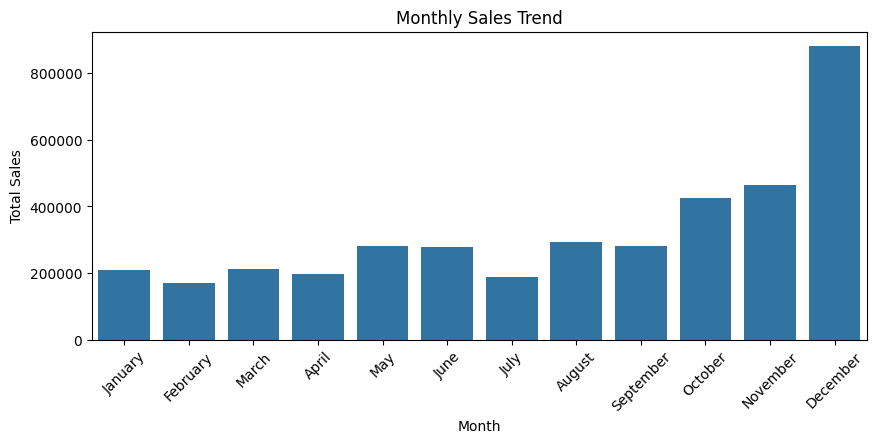

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(
    data=monthly_sales,
    x="MonthName",
    y="TotalSales"
)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

After ordering months correctly, the sales trend shows seasonal variation,
with higher revenue observed toward the end of the year.

In [17]:
country_sales = (
    df.groupby("Country")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_sales

Country
United Kingdom    3272810.14
EIRE                97500.23
Germany             94022.48
Netherlands         89850.96
France              85137.95
Australia           49209.71
Switzerland         27692.51
Spain               25007.25
Japan               17134.16
Belgium             16942.55
Name: TotalSales, dtype: float64

Country-wise analysis shows that a small number of countries
contribute most of the total revenue.

In [18]:
top_products = (
    df.groupby("Description")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER               62421.66
WHITE HANGING HEART T-LIGHT HOLDER     47912.03
PICNIC BASKET WICKER 60 PIECES         39619.50
JUMBO BAG RED RETROSPOT                37977.38
POSTAGE                                35265.15
ASSORTED COLOUR BIRD ORNAMENT          28511.93
PARTY BUNTING                          28271.52
Manual                                 26016.79
BLACK RECORD COVER FRAME               22447.01
Name: TotalSales, dtype: float64

A limited number of products generate a large share of total sales,
highlighting their importance to business performance.

## Key Business Insights

- Revenue is concentrated in a few countries.
- Sales show seasonal variation across months.
- A small number of products contribute significantly to total revenue.
- Data cleaning improves the reliability of insights.

This analysis demonstrates how a large transactional dataset can be cleaned
and analyzed to extract meaningful business insights.

The results highlight the importance of structured data preparation
and exploratory analysis in real-world business scenarios.